# Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

# Data Exploration

In [ ]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15585961.0,Hs?,684.0,France,Male,41.0,10.0,0.00,2.0,1.0,1.0,173948.40,1.0
1,1,15643378.0,Bellucci,807.0,France,Male,32.0,2.0,0.00,2.0,1.0,0.0,144532.85,0.0
2,2,15651022.0,O'Donnell,553.0,Germany,Male,53.0,9.0,102278.52,1.0,1.0,0.0,158816.03,1.0
3,3,15676521.0,Chiang,587.0,France,Female,34.0,6.0,0.00,1.0,1.0,0.0,167984.72,1.0
4,4,15772650.0,Kambinachi,732.0,Germany,Female,30.0,5.0,135070.92,1.0,1.0,1.0,116097.26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15687094.0,Teng,685.0,Spain,Female,34.0,8.0,0.00,2.0,1.0,1.0,158045.65,0.0
14996,14996,15763747.0,Mancini,560.0,Germany,Male,40.0,6.0,163549.63,1.0,1.0,1.0,173912.29,1.0
14997,14997,15578908.0,Kao,754.0,France,Male,32.0,9.0,0.00,2.0,1.0,0.0,182258.17,0.0
14998,14998,15775082.0,Genovese,706.0,France,Male,38.0,4.0,0.00,2.0,1.0,1.0,125062.02,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,7499.500000,1.570033e+07,659.345733,37.860800,5.059600,42141.821185,1.583600,0.781333,0.485067,1.189475e+05,0.201000
std,4330.271354,1.160243e+06,73.297801,8.293918,2.778686,59512.207816,0.527222,0.413356,0.499794,1.543819e+05,0.400761
min,0.000000,1.567237e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.477300e+02,0.000000
25%,3749.750000,1.563382e+07,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,8.292222e+04,0.000000
50%,7499.500000,1.569013e+07,663.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.229610e+05,0.000000
75%,11249.250000,1.575692e+07,710.000000,42.000000,7.000000,108909.120000,2.000000,1.000000,1.000000,1.567873e+05,0.000000
max,14999.000000,1.566703e+08,850.000000,74.000000,10.000000,204017.400000,4.000000,1.000000,1.000000,1.817172e+07,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# Data Preprocessing

In [ ]:
df.drop(columns=['id',	'CustomerId'	,'Surname'], inplace=True)

In [ ]:
test.drop(columns=['id',	'CustomerId'	,'Surname'], inplace=True)

In [ ]:
df.nunique()

,0
CreditScore,375
Geography,3
Gender,2
Age,57
Tenure,11
Balance,3360
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,6181


In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
test['Gender'] = le.transform(test['Gender'])

In [ ]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
test['Geography'] = le.transform(test['Geography'])

In [ ]:
df.head(10)
#france = 0
#germany = 1
#spain = 2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,684.0,0,1,41.0,10.0,0.00,2.0,1.0,1.0,173948.40,1.0
1,807.0,0,1,32.0,2.0,0.00,2.0,1.0,0.0,144532.85,0.0
2,553.0,1,1,53.0,9.0,102278.52,1.0,1.0,0.0,158816.03,1.0
3,587.0,0,0,34.0,6.0,0.00,1.0,1.0,0.0,167984.72,1.0
4,732.0,1,0,30.0,5.0,135070.92,1.0,1.0,1.0,116097.26,0.0
5,699.0,2,0,26.0,1.0,61687.33,1.0,0.0,1.0,108891.30,0.0
6,683.0,0,0,22.0,2.0,0.00,1.0,1.0,1.0,175070.94,0.0
7,644.0,0,0,27.0,4.0,92786.66,1.0,1.0,1.0,125889.20,0.0
8,602.0,0,1,29.0,2.0,171283.91,1.0,1.0,0.0,5962.50,0.0
9,559.0,2,1,55.0,8.0,0.00,1.0,1.0,0.0,167784.68,1.0


# Data Visualization

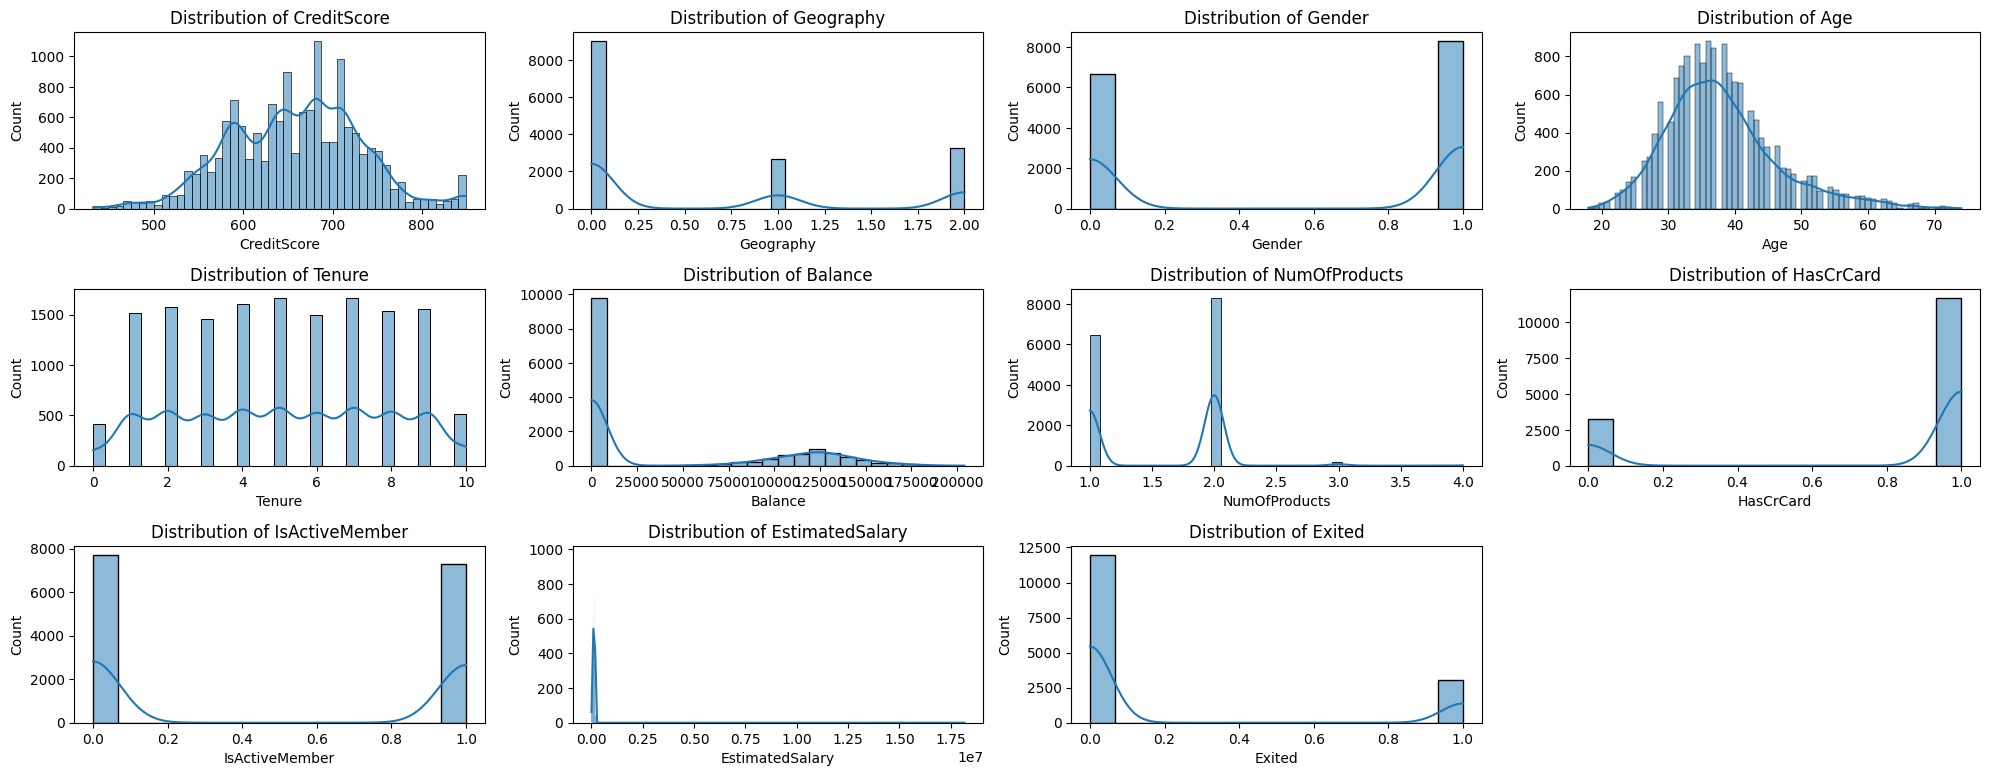

In [ ]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

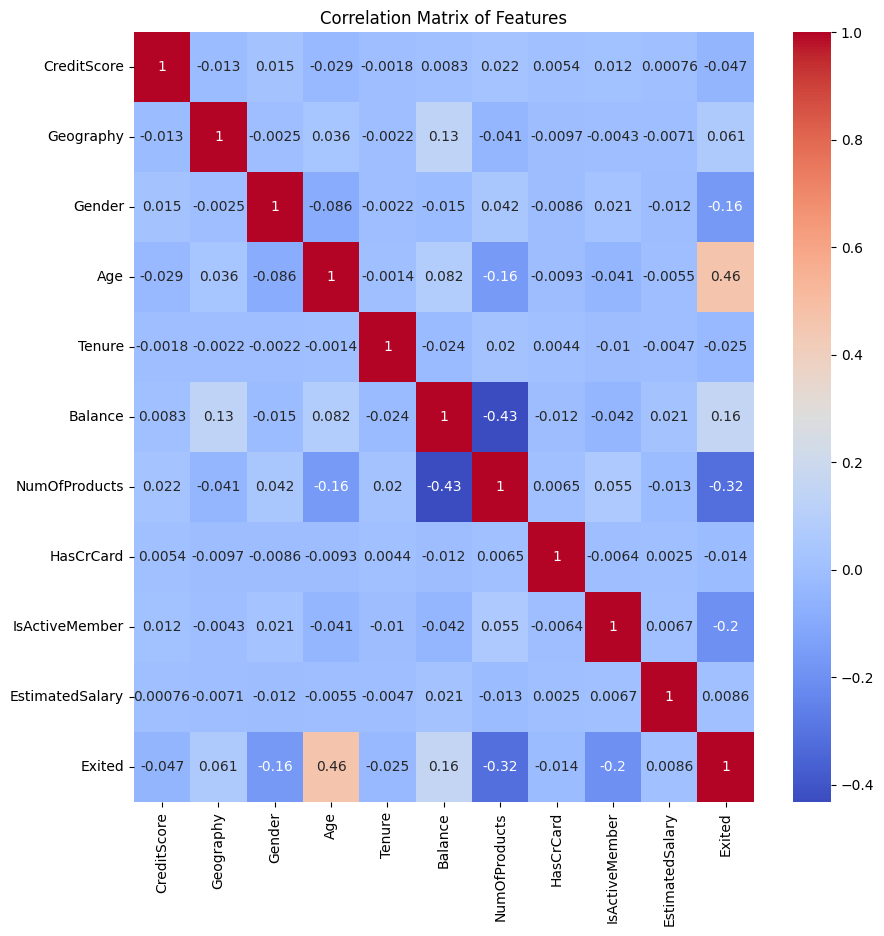

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

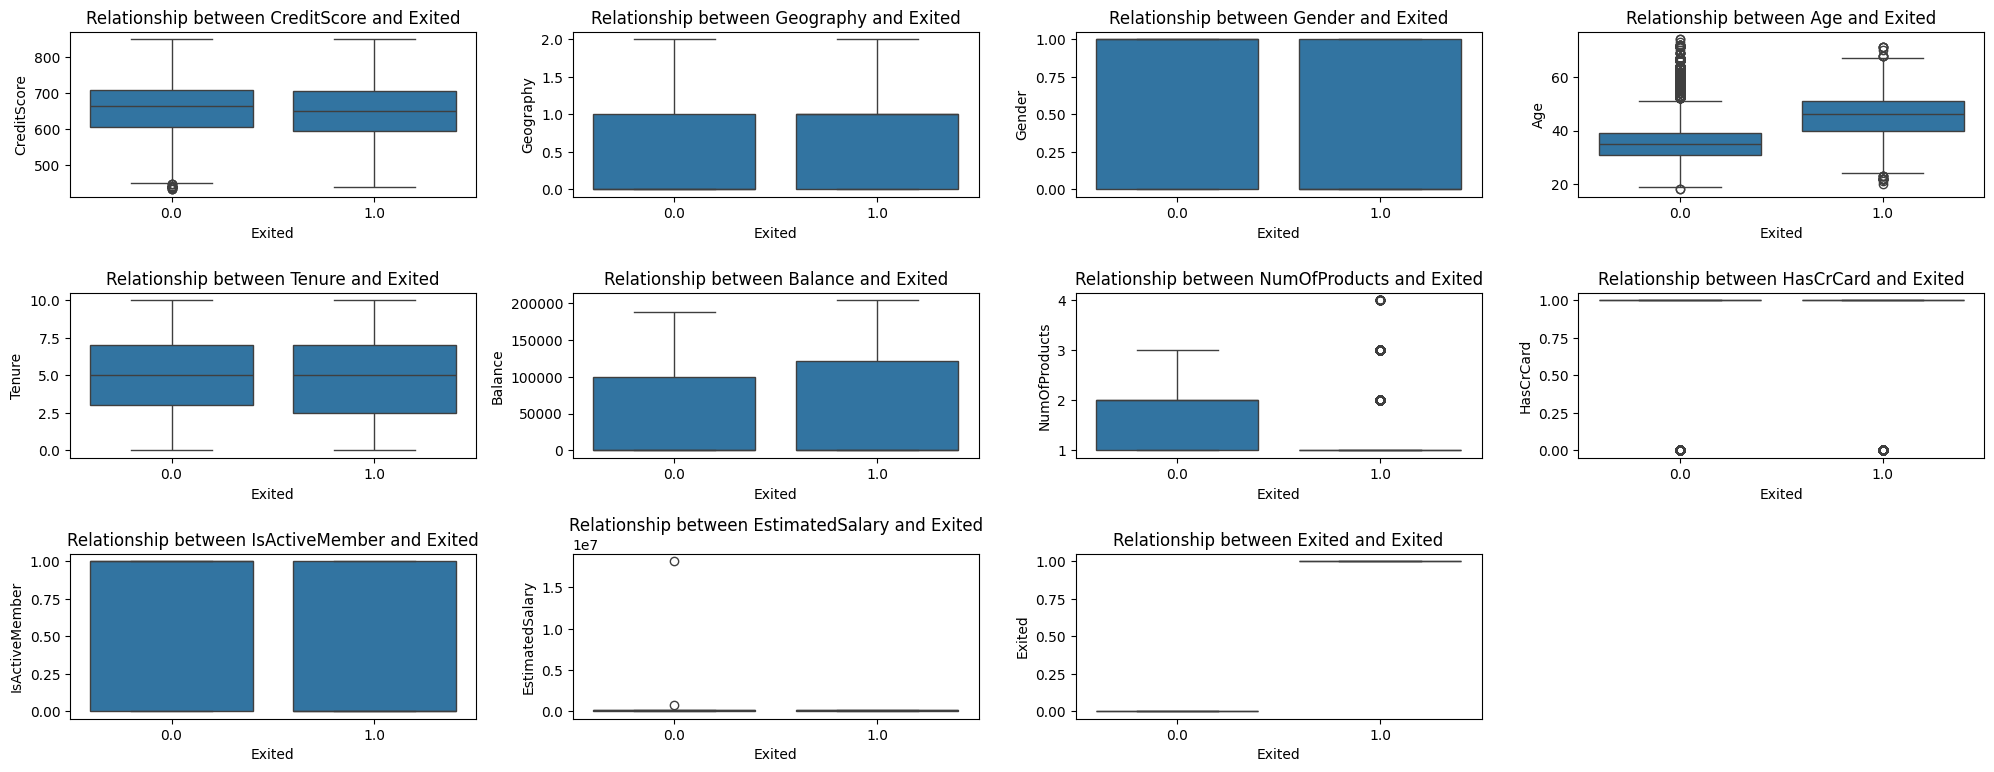

In [ ]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x='Exited', y=col)
    plt.title(f'Relationship between {col} and Exited')

plt.tight_layout()
plt.show()

In [ ]:
#  find the number of outliers in numOfProducts that have exited = 1

# Calculate the IQR for 'numOfProducts' where 'Exited' is 1
exited_1 = df[df['Exited'] == 1]
Q1 = exited_1['NumOfProducts'].quantile(0.25)
Q3 = exited_1['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = exited_1[(exited_1['NumOfProducts'] < lower_bound) | (exited_1['NumOfProducts'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in 'NumOfProducts' for 'Exited' = 1: {num_outliers}")

Number of outliers in 'NumOfProducts' for 'Exited' = 1: 516


In [ ]:
# Filter the DataFrame for people who have exited = 0
exited_0 = df[df['Exited'] == 1]

# Find the unique values in 'NumOfProducts' for those who exited = 0
unique_product_counts = exited_0['NumOfProducts'].value_counts()

# Display the unique values and their counts
unique_product_counts

,count
NumOfProducts,
1.0,2499
2.0,316
3.0,171
4.0,29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15000 non-null  float64
 1   Geography        15000 non-null  int64  
 2   Gender           15000 non-null  int64  
 3   Age              15000 non-null  float64
 4   Tenure           15000 non-null  float64
 5   Balance          15000 non-null  float64
 6   NumOfProducts    15000 non-null  float64
 7   HasCrCard        15000 non-null  float64
 8   IsActiveMember   15000 non-null  float64
 9   EstimatedSalary  15000 non-null  float64
 10  Exited           15000 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.3 MB


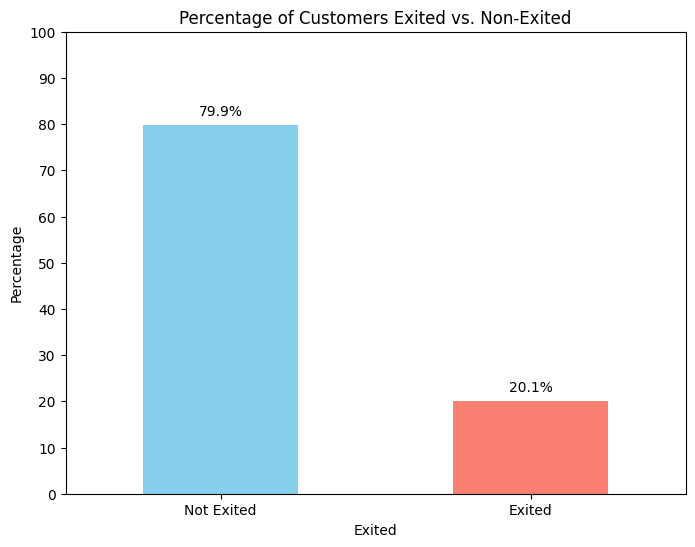

In [ ]:
# find percentage of customers exited vs non exited . visualize

# Calculate the percentage of customers who exited vs. didn't exit
exited_percentage = df['Exited'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
exited_percentage.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage of Customers Exited vs. Non-Exited')
plt.xlabel('Exited')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Not Exited', 'Exited'], rotation=0)
plt.yticks(np.arange(0, 101, 10))
for i, v in enumerate(exited_percentage):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center')
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

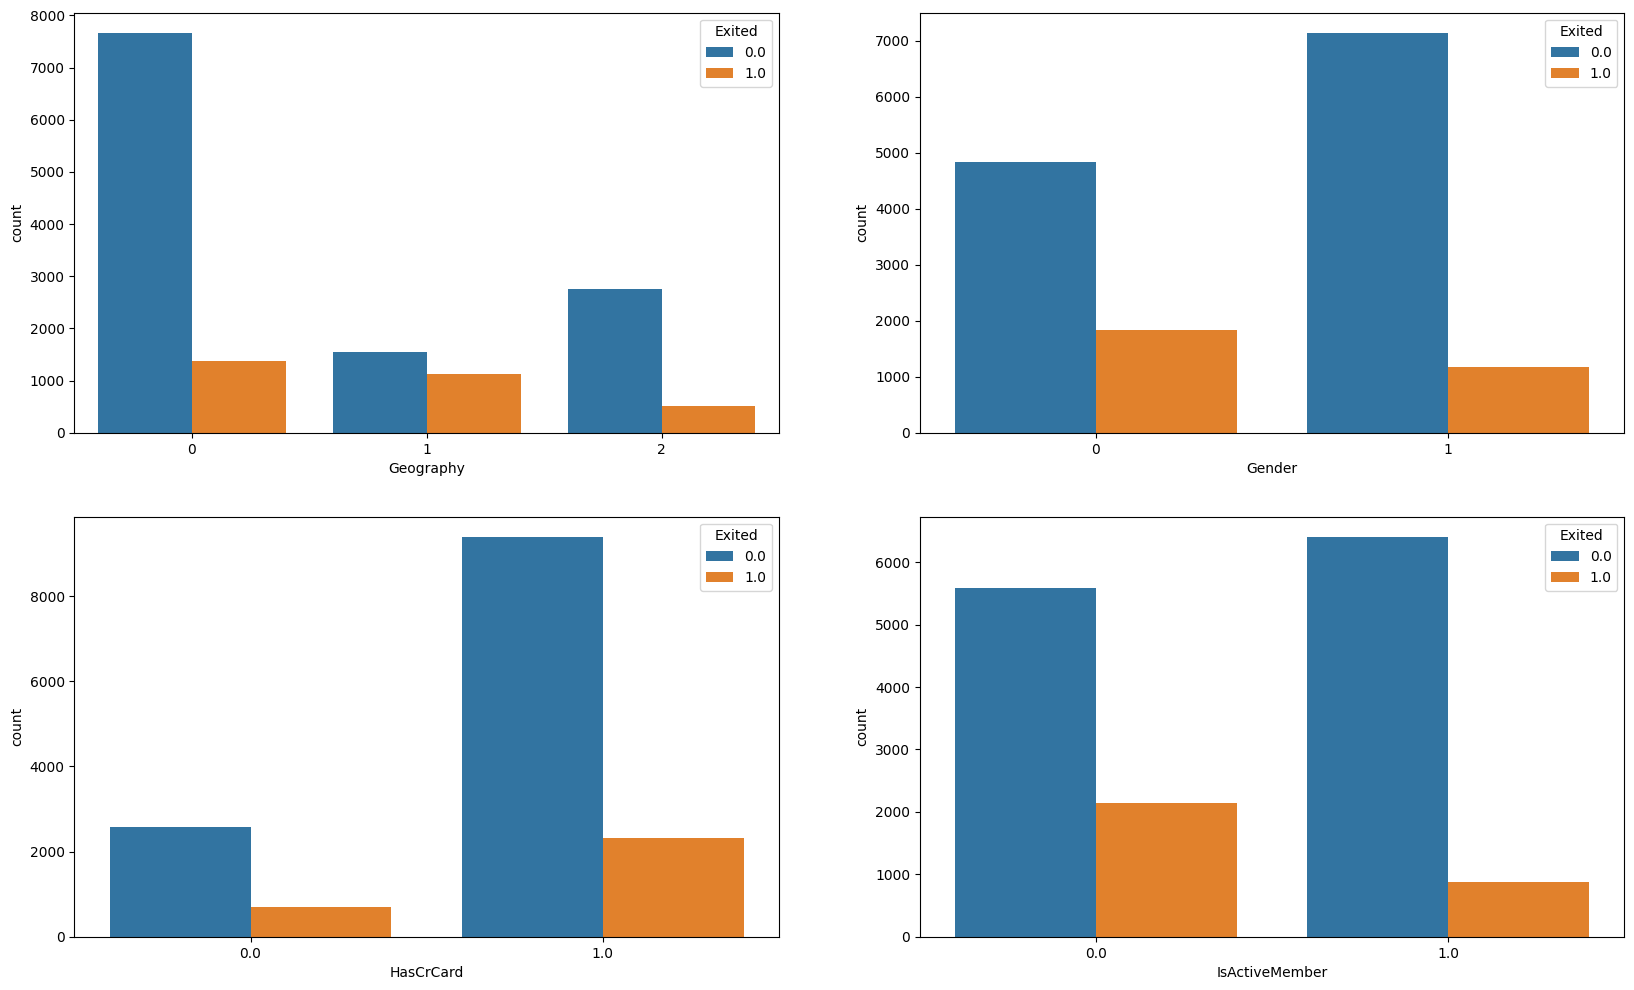

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

# Models

## Logistic Regression

**Logistic Regression:** Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not.

**Why was it used:** Since we only have two classes, we thought about using logistic regression since it can predict probability of whether a customer exited or not.

**Hyperparameters:** we used grid search to find best parameters. These are the best hyperparameters. Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}. It makes sense that L2 was favoured over L1 since data is not that overfitted. Algorithm to use in the optimization problem was liblinear.


**Final Result:**
Adding hyperparameters didn't add much of a difference. The score in validation was almost the same. For that reason, we submitted the normal logistic regression.

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)
y_val_proba = model.predict_proba(X_val_scaled)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics:")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

X_test_scaled = scaler.transform(test)

test_proba = model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({
    'id': test_original['id'],
    'Exited': test_proba
})

submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'.")



Validation Metrics:
ROC AUC: 0.8658
F1 Score: 0.6103
Submission file saved as 'submission.csv'.


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga'] # Solver algorithm
}

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_logreg_model = grid_search.best_estimator_
y_val_pred = best_logreg_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"Accuracy on validation set: {accuracy:.4f}")

test_proba = best_logreg_model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({'id': test_original['id'], 'Exited': test_proba})
submission.to_csv('logreg_gridsearch_submission.csv', index=False)
print("Submission file saved as 'logreg_gridsearch_submission.csv'")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on validation set: 0.8670
Submission file saved as 'logreg_gridsearch_submission.csv'


## Decision Tree

**Decision Tree:** A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on the feature values, creating a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents an outcome.

**Why was it used? :** A Decision Tree was chosen for its ability to handle imbalanced data and capture non-linear relationships in the dataset.

**Hyperparameters:** We used grid search to tune the hyperparameters and identify the optimal configuration for the model. The Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

**Standardization:** While Decision Trees are not typically sensitive to feature scaling, we performed standardization during the pipeline to ensure consistent preprocessing across all models.

**Final Results:** Hyperparameter tuning and standardization significantly improved the model's performance, as reflected in the substantial increase in the ROC AUC and F1 Score. These improvements indicate that the model now provides more accurate and balanced predictions.


In [ ]:
# Basic Decision Tree - No standrazatin or hyperparameter

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics:")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

test_proba = model.predict_proba(test)[:, 1]

submission = pd.DataFrame({
    'id': test_original['id'],
    'Exited': test_proba
})

submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'.")



Validation Metrics:
ROC AUC: 0.7604
F1 Score: 0.6104
Submission file saved as 'submission.csv'.


In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Set up Grid Search with ROC AUC scoring
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on validation data
best_model = grid_search.best_estimator_
y_val_proba = best_model.predict_proba(X_val_scaled)[:, 1]
y_val_pred = best_model.predict(X_val_scaled)

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics with Tuned Model:")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Standardize the test set
X_test_scaled = scaler.transform(test)

# Predict probabilities on the test set
test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_original['id'],
    'Exited': test_proba
})

submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'.")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

Validation Metrics with Tuned Model:
ROC AUC: 0.9091
F1 Score: 0.6636
Submission file saved as 'submission.csv'.


## Random forest

**Random Forest:** Random Forest is a supervised machine learning algorithm that operates by constructing multiple decision trees during training and outputs the class that is the mode of the classes of the individual trees in case of classification. It is robust to overfitting and can handle both numerical and categorical data effectively.



**Why was it used:** Random Forest's ensemble approach enhances the performance of Decision trees by minimizing the possibility of overfitting.

**Hyperparameters:** We used grid search to find the best hyperparameters for the model. The hyperparameters tuned included the
- number of estimators (n_estimators)
- the maximum depth of each tree (max_depth)
- the minimum number of samples required to split an internal node (min_samples_split)
- minimum number of samples required to be at a leaf node(min_samples_leaf)
- Weights associated with classes (class_weight)

After grid search, the best hyperparameters were:
`max_depth=10`,`class_weight='balanced_subsample'`,`min_samples_leaf=2`,`min_samples_split=10`,`  n_estimators=200`.

The selected hyperparameters make sense because increasing the number of trees (n_estimators) stabilizes the predictions, while limiting tree depth (max_depth) prevents overfitting.


**Final Result:**
The result after applying the best hyperparameters from grid search was significantly better than the baseline model.

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, class_weight='balanced')
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics:")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


test = pd.get_dummies(test, columns=['Geography', 'Gender'], drop_first=True)

test = test.reindex(columns=X.columns, fill_value=0)

test_proba = model.predict_proba(test)[:, 1]

submission = pd.DataFrame({
    'id': test_original['id'],
    'Exited': test_proba
})

submission.to_csv('RandomForestSubmission2.csv', index=False)



Validation Metrics:
ROC AUC: 0.9190
F1 Score: 0.7097


With GridSearch

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_val_pred = best_rf.predict(X_val)
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics:")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


test = pd.get_dummies(test, columns=['Geography', 'Gender'], drop_first=True)

test = test.reindex(columns=X.columns, fill_value=0)

test_proba = best_rf.predict_proba(test)[:, 1]

submission = pd.DataFrame({
    'id': test_original['id'],
    'Exited': test_proba
})

submission.to_csv('RandomForestSubmissionWithGridSearch.csv', index=False)
print("Submission file saved as 'RandomForestSubmissionWithGridSearch.csv'.")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Validation Metrics:
ROC AUC: 0.9262
F1 Score: 0.7289
Submission file saved as 'RandomForestSubmissionWithGridSearch.csv'.


## Comparison of the 3 models

In [2]:
data = {
    'Model': ['Logistic', 'Decision Trees Grid Search', 'Random Forest', 'Random Forest Grid search'],
    'ROC AUC in val' : [0.8658,0.9091,0.9190,0.9262],
    'ROC AUC in test': [0.88174,0.91203,0.93002, 0.93506]
}

df_results = pd.DataFrame(data)
df_results

,Model,ROC AUC in val,ROC AUC in test
0,Logistic,0.8658,0.88174
1,Decision Trees Grid Search,0.9091,0.91203
2,Random Forest,0.9190,0.93002
3,Random Forest Grid search,0.9262,0.93506


## GradientBoostingClassifier

**Model Description**:  
Gradient Boosting is an ensemble machine learning method that builds models sequentially, where each new model corrects the errors of the previous ones. It is a boosting technique that optimizes for a specific loss function by combining weak learners (typically decision trees) into a strong predictive model. Gradient Boosting often achieves high performance on structured/tabular datasets by focusing on areas where the model struggles, iteratively improving accuracy.

**Why Was It Used**:  
Gradient Boosting was chosen for its ability to capture non-linear relationships in the data and its exceptional performance on classification tasks with tabular data. It is particularly effective for datasets with imbalanced classes, as it focuses on minimizing the specific loss function. Additionally, Gradient Boosting supports hyperparameter tuning for further optimization and typically performs well in machine learning competitions.

**Final Result**:  
- **Validation ROC AUC**: 0.9296  
- **Test ROC AUC**: 0.93648  

These results demonstrate that Gradient Boosting significantly outperformed baseline models and other techniques, making it a highly effective approach for this problem.

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train_scaled, y_train)

y_val_pred = gbc_model.predict(X_val_scaled)
y_val_proba = gbc_model.predict_proba(X_val_scaled)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

X_test_scaled = scaler.transform(test)
test_proba = gbc_model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({'id': test_original['id'], 'Exited': test_proba})
submission.to_csv('gbc_submission.csv', index=False)
print("Submission file saved as 'gbc_submission.csv'")

ROC AUC: 0.9296
F1 Score: 0.7222
Submission file saved as 'hgbc_submission.csv'


## HistGradientBoosting

**Model Description**:  
The HistGradientBoostingClassifier is an optimized implementation of Gradient Boosting, specifically designed for speed and scalability. It works by binning continuous features into discrete bins, which reduces computation time and memory usage, making it ideal for large datasets. It uses decision trees as weak learners and iteratively corrects errors to improve the overall model performance.

**Why Was It Used**:  
HistGradientBoosting was selected for its computational efficiency and ability to handle tabular data effectively. It leverages histogram-based techniques to enhance the efficiency and scalability of gradient boosting, making it particularly suitable for large datasets. By focusing on these parameters, the model was tailored to the dataset, achieving a balance between bias and variance while maintaining high predictive accuracy.

**Final Result**:  
- **Hyperparameter Tuning**: Conducted using grid search over a range of 81 combinations of parameters, including:  
  - `learning_rate`: 0.2  
  - `max_depth`: 3  
  - `max_iter`: 200  
  - `min_samples_leaf`: 30  
- **Validation Metrics**:  
  - **ROC AUC**: 0.9283  
  - **F1 Score**: 0.7330  
- **Test Metrics** : 0.93853  

These results indicate that the HistGradientBoosting model, enhanced through hyperparameter tuning, delivered outstanding performance. It slightly edged out other models, such as standard Gradient Boosting, particularly in the test set evaluation, making it a robust choice for the problem.

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

hgbc_model = HistGradientBoostingClassifier(random_state=42)
hgbc_model.fit(X_train_scaled, y_train)

y_val_pred = hgbc_model.predict(X_val_scaled)
y_val_proba = hgbc_model.predict_proba(X_val_scaled)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

X_test_scaled = scaler.transform(test)
test_proba = hgbc_model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({'id': test_original['id'], 'Exited': test_proba})
submission.to_csv('hgbc_submission.csv', index=False)
print("Submission file saved as 'hgbc_submission.csv'")

ROC AUC: 0.9269
F1 Score: 0.7221
Submission file saved as 'hgbc_submission.csv'


In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_iter': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [10, 20, 30]
}

hgbc_model = HistGradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=hgbc_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

best_hgbc_model = grid_search.best_estimator_

y_val_pred = best_hgbc_model.predict(X_val_scaled)
y_val_proba = best_hgbc_model.predict_proba(X_val_scaled)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Validation ROC AUC: {roc_auc:.4f}")
print(f"Validation F1 Score: {f1:.4f}")

X_test_scaled = scaler.transform(test)
test_proba = best_hgbc_model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({'id': test_original['id'], 'Exited': test_proba})
submission.to_csv('hgbc_submission_grid.csv', index=False)
print("Submission file saved as 'hgbc_submission.csv'")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 200, 'min_samples_leaf': 30}
Validation ROC AUC: 0.9283
Validation F1 Score: 0.7330
Submission file saved as 'hgbc_submission.csv'


In [ ]:
#HIGHEST SCORE IN HISTGRADIENT

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

hgbc_model = HistGradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=3,
    max_iter=200,
    min_samples_leaf=30,
    random_state=42
)
hgbc_model.fit(X_train_scaled, y_train)

y_val_pred = hgbc_model.predict(X_val_scaled)
y_val_proba = hgbc_model.predict_proba(X_val_scaled)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation ROC AUC: {roc_auc:.4f}")
print(f"Validation F1 Score: {f1:.4f}")

X_test_scaled = scaler.transform(test)
test_proba = hgbc_model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({'id': test_original['id'], 'Exited': test_proba})
submission.to_csv('hgbc_submission_grid_2.csv', index=False)
print("Submission file saved as 'hgbc_submission.csv'")

Validation ROC AUC: 0.9293
Validation F1 Score: 0.7229
Submission file saved as 'hgbc_submission.csv'


## AdaBoostClassifier

**AdaBoost**: AdaBoost (Adaptive Boosting) is an ensemble machine learning algorithm that combines multiple weak classifiers (usually Decision Trees) to create a strong classifier. It works by sequentially training models, with each model focusing more on the instances misclassified by the previous ones. The final predictions are made based on a weighted vote of all the models.

**Why was it used?: ** We chose AdaBoost because it excels at improving the performance of weak learners and is particularly effective for imbalanced datasets.

**Hyperparameters:** base_estimator: Decision Tree with max_depth=2 ,n_estimators=200 , learning_rate=0.1

**Final Results:**  Hyperparameter tuning significantly enhanced the model's performance.

In [ ]:
# AdaBoost best n_estimators
# n_estimators=200 !!

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train AdaBoostClassifier
base_learner = DecisionTreeClassifier(max_depth=2, random_state=42)  # Use a decision tree as the base learner
model = AdaBoostClassifier(estimator=base_learner, n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
y_val_proba = model.predict_proba(X_val_scaled)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics:")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Standardize the test set
X_test_scaled = scaler.transform(test)

test_proba = model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({
    'id': test_original['id'],
    'Exited': test_proba
})

submission.to_csv('AdaBoostClassifier_200.csv', index=False)
print("Submission file saved as 'submission.csv'.")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Validation Metrics:
ROC AUC: 0.9273
F1 Score: 0.7243
Submission file saved as 'submission.csv'.


## Voting

**Voting Classifier**:  
The Voting Classifier is an ensemble learning method that combines the predictions of multiple models (e.g., Gradient Boosting, Logistic Regression, AdaBoost) to improve classification performance. It supports two types of voting:  
- **Hard Voting:** Uses the majority class predicted by individual models.  
- **Soft Voting:** Averages predicted probabilities from individual models, assigning the class with the highest average probability.



**Why was it used:**  
The Voting Classifier was chosen because it combines the strengths of multiple models with different characteristics:
- **GradientBoostingClassifier** captures complex patterns in the data.  
- **LogisticRegression** offers simplicity and interpretability.  
- **AdaBoostClassifier** focuses on difficult-to-classify samples.  
By aggregating these diverse models using **soft voting**, we achieved a more robust and accurate prediction. This was particularly suitable for our customer churn problem, where capturing both linear and non-linear patterns improves performance.



**Hyperparameters:**  
The hyperparameters for the combined Voting Classifier were adjusted to use **soft voting**, which improves accuracy by leveraging probability estimates from each model.



In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf2 = LogisticRegression(max_iter=200, random_state=42)
clf3 = AdaBoostClassifier(n_estimators=100, random_state=42)

eclf = VotingClassifier(
    estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)],
    voting='soft'
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', eclf)
])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)
probabilities = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, probabilities)
f1 = f1_score(y_test, predictions)

print("Final Performance Metrics:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

test = pd.get_dummies(test, columns=['Geography', 'Gender'], drop_first=True)

test = test.reindex(columns=X.columns, fill_value=0)

test_proba = pipeline.predict_proba(test)[:, 1]

submission = pd.DataFrame({
    'id': test_original['id'],
    'Exited': test_proba
})

submission.to_csv('Voting_GradientBoostingClassifier_LogisticRegression_AdaBoostClassifier.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Final Performance Metrics:
Accuracy Score: 0.8873
ROC AUC: 0.9223
F1 Score: 0.6876


**Feature Selector**:  
A feature selector is a method used to identify and retain only the most relevant features from a dataset, reducing noise and dimensionality while preserving the features that contribute most to the model's performance. In this case, we used **`SelectFromModel`** with the **Voting** to select features based on their importance scores.



**Why was it used:**  
Feature selection was implemented to address potential issues caused by irrelevant or redundant features, such as:  
1. **Noise Reduction:** Removing irrelevant features reduces overfitting, as the model focuses only on meaningful patterns.  
2. **Dimensionality Reduction:** By decreasing the number of input features, training time and computational complexity are reduced.  

For our application, feature selection helped improve the prediction of customer churn by focusing on key drivers of the target variable (`Exited`), such as customer demographics and account features.



**Result After Applying Feature Selector:**  
After applying the feature selector, the model showed measurable improvements:  
- **ROC AUC increased**, indicating better discrimination between customers likely to churn and those who will not.  
- **F1 Score improved**, highlighting a better balance between precision and recall.  
The feature selector allowed the model to make predictions more effectively by concentrating on the most relevant data points.

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_cols)
    ],
    remainder='passthrough'
)

clf1 = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=4, random_state=42)
clf2 = LogisticRegression(solver='liblinear', max_iter=300, C=1.0, random_state=42)
clf3 = AdaBoostClassifier(n_estimators=150, learning_rate=0.1, random_state=42)

eclf = VotingClassifier(
    estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)],
    voting='soft',
    weights=[3, 1, 2]
)

feature_selector = SelectFromModel(clf1, threshold='median')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('voting', eclf)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')

print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean CV ROC AUC: {cv_scores.mean():.4f}")

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)
probabilities = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, probabilities)
f1 = f1_score(y_test, predictions)

print("\nFinal Performance Metrics on Test Set:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

test = pd.get_dummies(test, columns=['Geography', 'Gender'], drop_first=True)

test = test.reindex(columns=X.columns, fill_value=0)

test_proba = pipeline.predict_proba(test)[:, 1]

submission = pd.DataFrame({
    'id': test_original['id'],
    'Exited': test_proba
})

submission.to_csv('Voting_GradientBoostingClassifier_LogisticRegression_AdaBoostClassifier_featureselector.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-Validation ROC AUC Scores: [0.94392283 0.92601539 0.94130188 0.93846979 0.93633243]
Mean CV ROC AUC: 0.9372


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Final Performance Metrics on Test Set:
Accuracy Score: 0.8983
ROC AUC: 0.9296
F1 Score: 0.7250


## Best Model: Gradient Boosting with Grid Search and Feature Selector

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X = pd.get_dummies(X, drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

gbc_model = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
}

random_search = RandomizedSearchCV(
    estimator=gbc_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_scaled, y_train)

best_gbc = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

y_val_pred = best_gbc.predict(X_val_scaled)
y_val_proba = best_gbc.predict_proba(X_val_scaled)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print(f"Optimized ROC AUC: {roc_auc:.4f}")
print(f"Optimized F1 Score: {f1:.4f}")

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gbc.feature_importances_
}).sort_values(by='Importance', ascending=False)

selector = SelectFromModel(best_gbc, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)

best_gbc.fit(X_train_selected, y_train)

y_val_pred = best_gbc.predict(X_val_selected)
y_val_proba = best_gbc.predict_proba(X_val_selected)[:, 1]

roc_auc_fs = roc_auc_score(y_val, y_val_proba)
f1_fs = f1_score(y_val, y_val_pred)

print(f"Feature Selected ROC AUC: {roc_auc_fs:.4f}")
print(f"Feature Selected F1 Score: {f1_fs:.4f}")


Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}
Optimized ROC AUC: 0.9295
Optimized F1 Score: 0.7269
Feature Selected ROC AUC: 0.9311
Feature Selected F1 Score: 0.7268


In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X.drop(columns=['CustomerId', 'Surname'], errors='ignore', inplace=True)
test.drop(columns=['CustomerId', 'Surname'], errors='ignore', inplace=True)

X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

X, test = X.align(test, join='left', axis=1, fill_value=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

gbc_model = GradientBoostingClassifier(subsample=1.0, n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_depth=3, learning_rate=0.2)
gbc_model.fit(X_train_scaled, y_train)

selector = SelectFromModel(gbc_model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

gbc_model.fit(X_train_selected, y_train)

y_val_pred = gbc_model.predict(X_val_selected)
y_val_proba = gbc_model.predict_proba(X_val_selected)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
f1 = f1_score(y_val, y_val_pred)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

test_proba = gbc_model.predict_proba(X_test_selected)[:, 1]

submission = pd.DataFrame({'id': test_original['id'], 'Exited': test_proba})
submission.to_csv('gbc_submission_feautureselector.csv', index=False)
print("Submission file saved as 'gbc_submission_feautureselector.csv'")


ROC AUC: 0.9310
F1 Score: 0.7256
Submission file saved as 'gbc_submission_feautureselector.csv'


In Kaggle test: 0.93951